<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [80]:
movies = pd.read_csv('./imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [81]:
# Answer: 6 columns, 979 rows 

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Check the data type of each column.

In [7]:
# Answer:

movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [9]:
# Answer: the average duration is 120 minutes
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [18]:
# Answer: shortest movie at 64 minutes is "Freaks" and longest movie at 242 minutes is "Hamlet". 
#I found the duration number using the .describe but had to use sort_values to find the titles of the movies

movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [13]:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

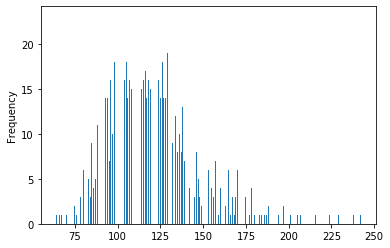

In [17]:
# Answer: for bins, the 500 seems more accurate but from my perspective, i prefer the look of the lower bin number (50 or 100) with chunkier bars


movies.duration.plot(kind='hist', bins=500);

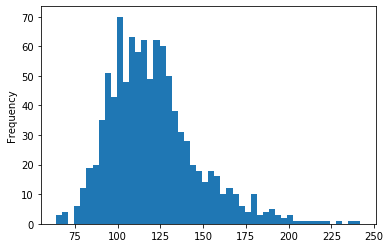

In [24]:
movies.duration.plot(kind='hist', bins=50);

#### Use a box plot to display that same data.

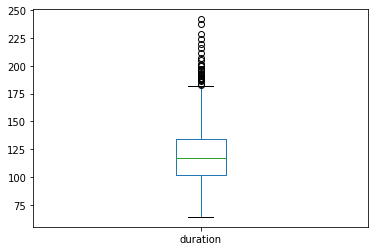

In [27]:
# Answer:
movies.duration.plot(kind = 'box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [28]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

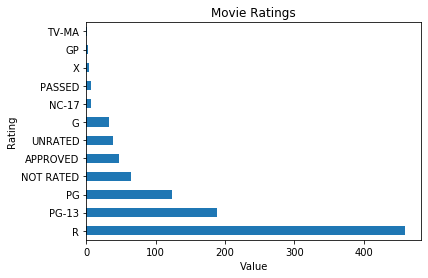

In [45]:
# Answer:
#movies.groupby('content_rating').plot(kind='bar');
movies.content_rating.value_counts().plot(kind='barh', title='Movie Ratings')
plt.ylabel('Rating');
plt.xlabel('Value');



#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [51]:
# Answer:

ratings_change_df = movies.replace(['NOT RATED','APPROVED','PASSED','GP','X','TV-MA'], ['UNRATED','UNRATED','UNRATED','UNRATED','NC-17','NC-17'])
ratings_change_df.content_rating.value_counts()




R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [ ]:
# Answer:SEE ABOVE. I did the above and then just added in these two additional content changes. 

#### Count the number of missing values in each column.

In [52]:
# Answer: 3 content ratings are missing 

movies.isnull()

,star_rating,title,content_rating,genre,duration,actors_list
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
974,False,False,False,False,False,False
975,False,False,False,False,False,False
976,False,False,False,False,False,False
977,False,False,False,False,False,False


In [53]:

movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [56]:

movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [63]:
# Answer: lines 187, 649 and 936 all have nothing entered for the content_rating column. 
#movies.content_rating.fillna(value='PG')#THIS DIDNT WORK
#drinks.continent.fillna(value='NA')#THIS SHOULD MAKE na VALUES INSTEAD SAY NA

movies.content_rating.fillna(value='UNRATED', inplace=True)

In [62]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [68]:
# Answer:mean for less than 2 hours is 7.83star rating and mean for longer movies is 7.94 stars so they're about the same

a = movies[movies.duration < 120]
b = movies[movies.duration >=120 ]

print (a.star_rating.mean())

print (b.star_rating.mean())


7.838666666666657
7.948898678414082


#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [69]:
import seaborn as sns

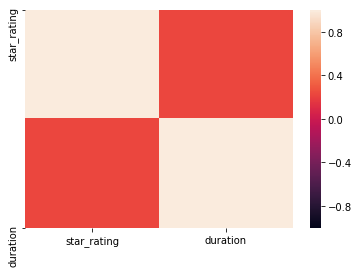

In [70]:
# Answer:Their is a very small relationship between duration and star rating 
#I don't think there is any correlation between one or the other 


sns.set_palette("coolwarm", 7)
sns.heatmap(movies.corr(), vmin=-1, vmax=1)

In [72]:
movies.corr()

,star_rating,duration
star_rating,1.000000,0.227149
duration,0.227149,1.000000


#### Calculate the average duration for each genre.

In [74]:
# Answer:

movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

## Advanced level

#### Visualize the relationship between content rating and duration.

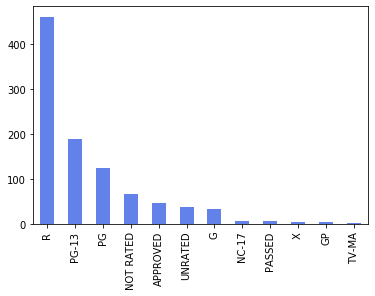

In [92]:
# Answer: tried a few things to plot by duration and couldn't get it...
#movies.plot(x='duration', y='content_rating', kind='scatter', color='dodgerblue', figsize=(15,7), s=20);
#movies.content_rating.value_counts().plot(y='duration', kind='bar');


movies.content_rating.value_counts().plot(kind='bar');



#### Determine the top rated movie (by star rating) for each genre.

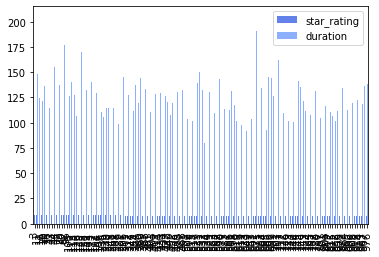

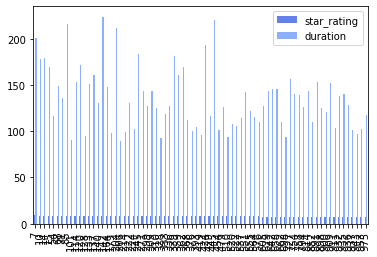

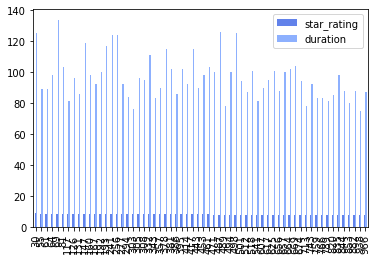

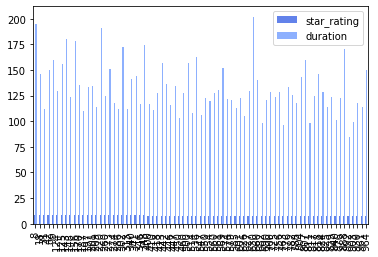

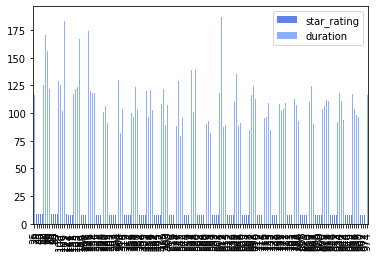

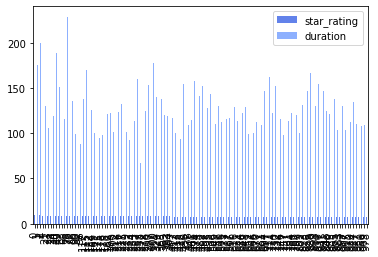

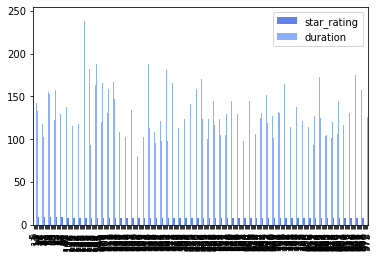

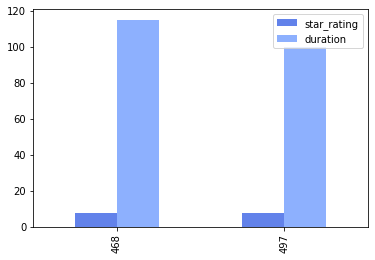

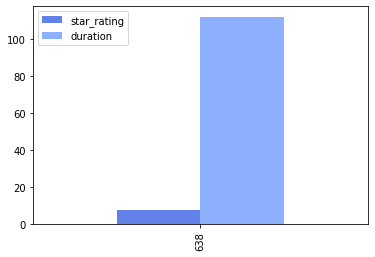

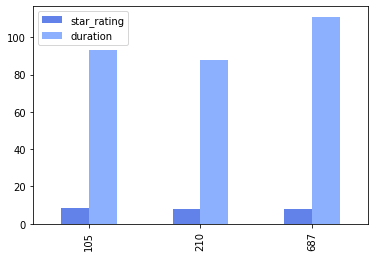

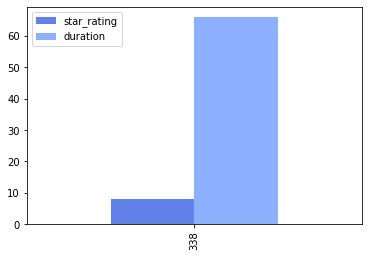

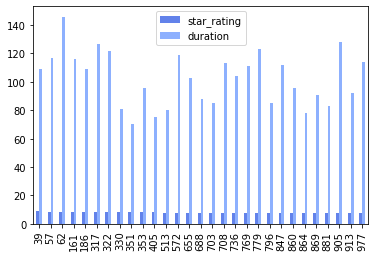

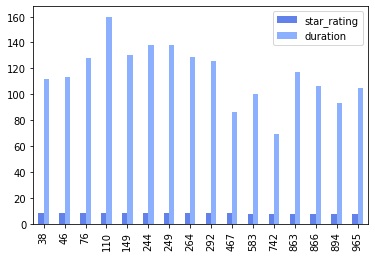

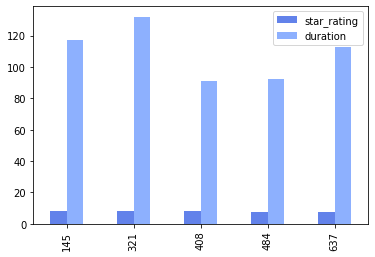

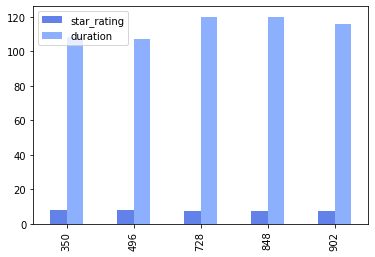

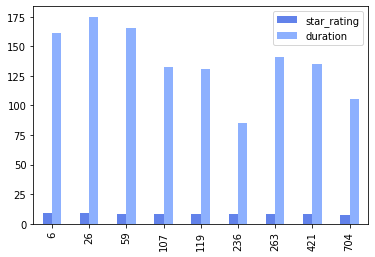

In [99]:
# Answer: I'm not sure what happened below...I'm not sure why it gave so many charts...

movies.groupby('genre').plot(kind='bar');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


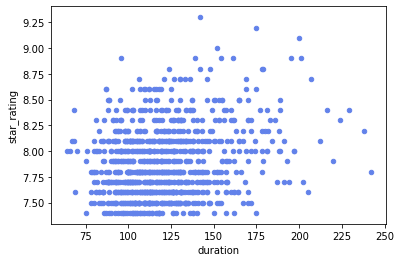

In [100]:

movies.plot(x = 'duration',y = 'star_rating', kind = 'scatter');

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [101]:
# Answer:it looks like there are duplicates but they're each a different version of the movie, not an actual duplicate. 


duplicate_title = movies.title.duplicated(keep=False)
movies[duplicate_title]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [102]:
#This is the answer to the below question. This is the average for all the movie genres 
movies.groupby('genre').mean()

,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Family,7.850000,107.500000
Fantasy,7.700000,112.000000


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [103]:
# Answer: we only need to calcuate for these genres -- so we can then use the above list to pull star ratings 
#Drama        278
#Comedy       156
#Action       136
#Crime        124
#Biography     77
#Adventure     75
#Animation     62
#Horror        29
#Mystery       16
movies['genre'].value_counts()


Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [104]:
relevant_genre_list = ['Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery']

In [107]:


Final_list = movies['genre'].isin(relevant_genre_list)
movies[Final_list].groupby('genre').mean()


,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Horror,7.806897,102.517241
Mystery,7.975000,115.625000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!